In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet,SGDClassifier,SGDRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,mean_absolute_error,confusion_matrix,classification_report,roc_auc_score,roc_curve,f1_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,AdaBoostRegressor,AdaBoostClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from pandas.api.types import is_string_dtype,is_numeric_dtype
import joblib as joblib


In [39]:
df=pd.read_csv('train_agriculture.csv')
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [40]:
#droping ID column as it is just an identifier
df=df.drop('ID',axis=1)
df

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
88853,3337,1,0,2,10,12.0,44,3,0
88854,3516,1,0,2,10,20.0,38,1,0
88855,3516,1,0,2,15,40.0,8,2,0
88856,3702,1,0,2,10,25.0,18,3,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  88858 non-null  int64  
 1   Crop_Type                88858 non-null  int64  
 2   Soil_Type                88858 non-null  int64  
 3   Pesticide_Use_Category   88858 non-null  int64  
 4   Number_Doses_Week        88858 non-null  int64  
 5   Number_Weeks_Used        79858 non-null  float64
 6   Number_Weeks_Quit        88858 non-null  int64  
 7   Season                   88858 non-null  int64  
 8   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 6.1 MB


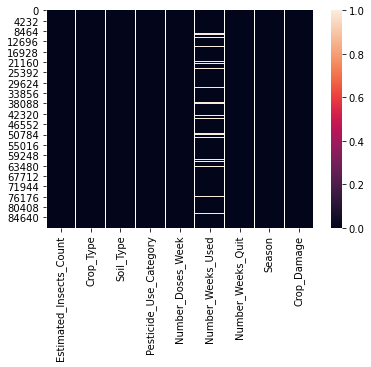

In [42]:
#Number_Weeks_Used column has missing values .
sns.heatmap(df.isna())


In [43]:
#Above heatmap shows Number_Weeks_Used column has missing values .
df.isna().sum()

Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [44]:
#Lets print unique values for each column
for col in df.columns:
    print("***************",col,"************")
    print(df[col].value_counts())
    print('\n')

*************** Estimated_Insects_Count ************
1212    3438
1132    3370
1478    3358
1385    3309
1056    3235
        ... 
3896     134
3515     123
4097     113
231       89
169       63
Name: Estimated_Insects_Count, Length: 71, dtype: int64


*************** Crop_Type ************
0    63589
1    25269
Name: Crop_Type, dtype: int64


*************** Soil_Type ************
0    48124
1    40734
Name: Soil_Type, dtype: int64


*************** Pesticide_Use_Category ************
2    63709
3    24312
1      837
Name: Pesticide_Use_Category, dtype: int64


*************** Number_Doses_Week ************
20    22589
40    12298
10    12111
30    10438
15     8178
5      5520
25     4890
60     4367
50     3361
35     1832
45      936
0       837
80      672
70      303
55      277
90       83
65       64
75       61
95       30
85       11
Name: Number_Doses_Week, dtype: int64


*************** Number_Weeks_Used ************
20.0    3878
30.0    3765
25.0    3120
40.0    2707
15.0

In [45]:
#Total 9k missing value present in dataset .Lets remove those
df=df.dropna()
df['Crop_Damage'].value_counts()

0    66743
1    11059
2     2056
Name: Crop_Damage, dtype: int64

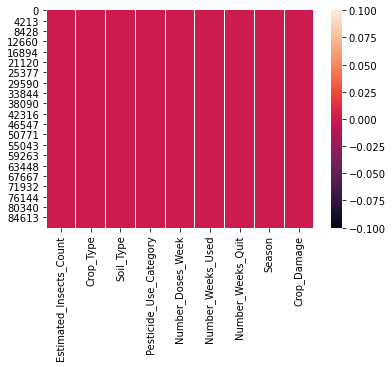

In [46]:
sns.heatmap(data=df.isna())

In [47]:
df.isin(['?']).sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

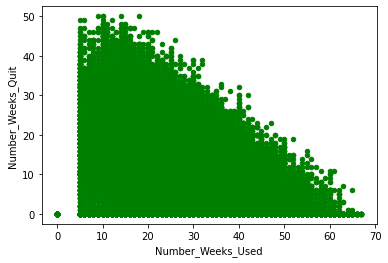

In [48]:
df.plot.scatter(x='Number_Weeks_Used',y='Number_Weeks_Quit',c='green')
# When Number_Weeks_Quit value inceases Number_Weeks_Used decrease

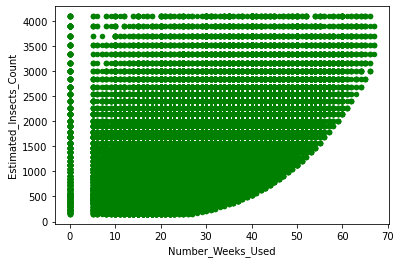

In [49]:
df.plot.scatter(x='Number_Weeks_Used',y='Estimated_Insects_Count',c='green')



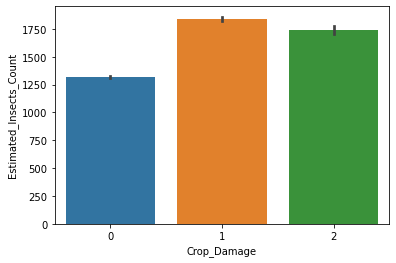

In [50]:
sns.barplot(data=df,x='Crop_Damage',y='Estimated_Insects_Count')
#Below graph tells that if Insects count is less then chance of crop alive is more 

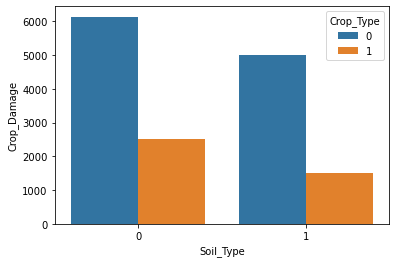

In [51]:
sns.barplot(data=df[df.Crop_Damage>0].groupby(['Soil_Type','Crop_Type']).sum()['Crop_Damage'].reset_index(),x='Soil_Type',y='Crop_Damage',hue='Crop_Type')
#In both soil type crop_type 0 can be cultivated ...

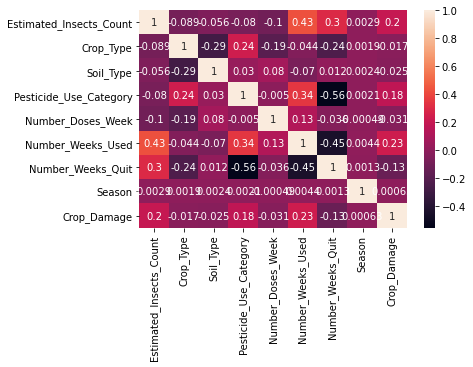

In [52]:
#heatmap shows absence of missing values in dataset
#find corelation
corr_=df.corr()
sns.heatmap(data=corr_,annot=True)

In [53]:
#Presticide_Use_Category is -vely correlated with Number_Weeks_Quit .
#Number_Weeks_Used is -vely correlated with Number_Weeks_Quit
#Number_Weeks_Used is +vely corelated with Estimated_Insects_count 
#remove Number_Weeks_Quit feature
df=df.drop('Number_Weeks_Quit',axis=1)
df.shape

(79858, 8)

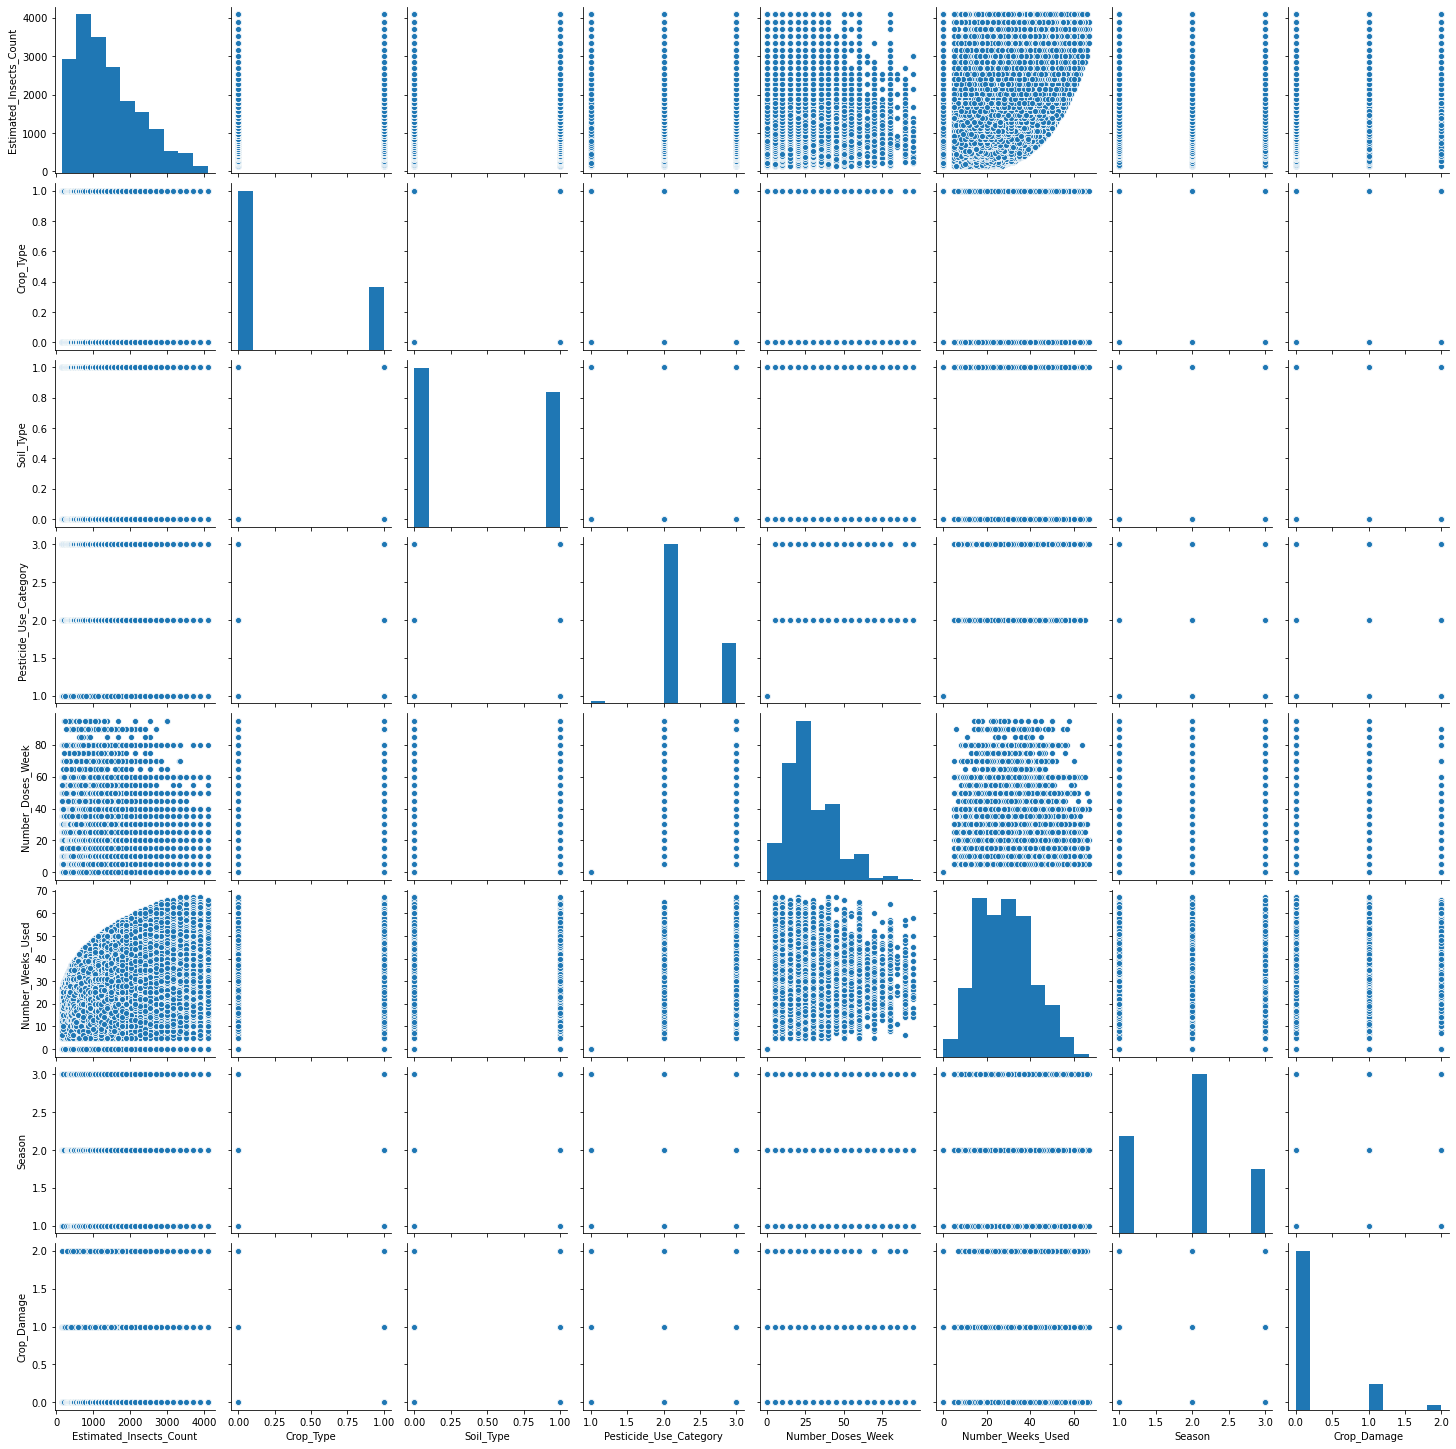

In [54]:
sns.pairplot(data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023CB3741CD0>,
      dtype=object)

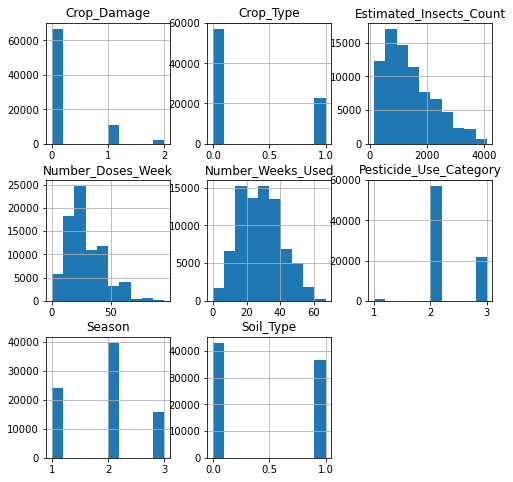

In [55]:
df.hist(figsize=(8,8))

In [56]:
#skewed data present in Estimated_Insects_Counts and Number_Doses_Week
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Season,Crop_Damage
count,79858.000000,79858.000000,79858.000000,79858.000000,79858.000000,79858.000000,79858.000000,79858.000000
mean,1400.766060,0.283829,0.459503,2.264820,25.848381,28.623970,1.896441,0.189975
std,850.268301,0.450858,0.498360,0.461764,15.544704,12.391881,0.701498,0.453187
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,3.000000,2.000000


In [57]:
#skewed data present in Estimated_Insects_Count,Number_Doses_Week column
#Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used has outliers
df.skew()

Estimated_Insects_Count    0.837894
Crop_Type                  0.958957
Soil_Type                  0.162525
Pesticide_Use_Category     0.780558
Number_Doses_Week          0.965393
Number_Weeks_Used          0.244592
Season                     0.146102
Crop_Damage                2.369627
dtype: float64

In [58]:
#remove skewed data where skewness is > 0.55
for col in df.columns:
    if(col!='Crop_Damage'):
        if(df[col].skew()>0.55):
            df[col]=np.log1p(df[col])

Estimated_Insects_Count        AxesSubplot(0.125,0.71587;0.352273x0.16413)
Crop_Type                   AxesSubplot(0.547727,0.71587;0.352273x0.16413)
Soil_Type                     AxesSubplot(0.125,0.518913;0.352273x0.16413)
Pesticide_Use_Category     AxesSubplot(0.547727,0.518913;0.352273x0.16413)
Number_Doses_Week             AxesSubplot(0.125,0.321957;0.352273x0.16413)
Number_Weeks_Used          AxesSubplot(0.547727,0.321957;0.352273x0.16413)
Season                           AxesSubplot(0.125,0.125;0.352273x0.16413)
Crop_Damage                   AxesSubplot(0.547727,0.125;0.352273x0.16413)
dtype: object

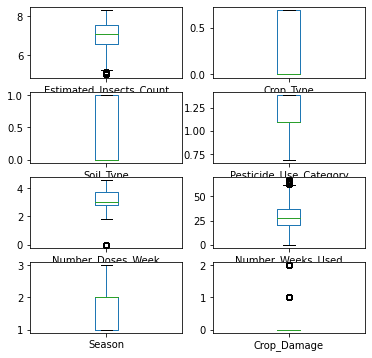

In [59]:
df.plot.box(layout=(4,2),figsize=(6,6),subplots=True)

In [60]:
#outliers present on number_weeks_Used,crop_Damage,Number_Doses_Week and Estimated_Insects_Count
#remove outliers
#z=np.abs(zscore(df))
#df=df[(z<3).all(axis=1)]
#df.shape
#after removing outlier crp_damage type 2 is removing.So not removing outlier

In [62]:
df

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Season,Crop_Damage
0,5.241747,0.693147,0,0.693147,0.000000,0.0,1,0
1,5.347108,0.693147,0,0.693147,0.000000,0.0,2,1
2,5.552960,0.693147,0,0.693147,0.000000,0.0,2,1
3,5.552960,0.693147,1,0.693147,0.000000,0.0,2,1
4,5.837730,0.693147,0,0.693147,0.000000,0.0,2,1
...,...,...,...,...,...,...,...,...
88853,8.113127,0.693147,0,1.098612,2.397895,12.0,3,0
88854,8.165364,0.693147,0,1.098612,2.397895,20.0,1,0
88855,8.165364,0.693147,0,1.098612,2.772589,40.0,2,0
88856,8.216899,0.693147,0,1.098612,2.397895,25.0,3,0


In [63]:
df['Crop_Damage'].value_counts()

0    66743
1    11059
2     2056
Name: Crop_Damage, dtype: int64

In [64]:
x=df.drop('Crop_Damage',axis=1)
y=df['Crop_Damage']
print(x.shape,y.shape)

(79858, 7) (79858,)


In [65]:
standardScaler=StandardScaler()
x=standardScaler.fit_transform(x)
x

array([[-2.65367605,  1.58847433, -0.92203548, ..., -4.62076154,
        -2.30991148, -1.27790384],
       [-2.49830388,  1.58847433, -0.92203548, ..., -4.62076154,
        -2.30991148,  0.1476262 ],
       [-2.19473968,  1.58847433, -0.92203548, ..., -4.62076154,
        -2.30991148,  0.1476262 ],
       ...,
       [ 1.65769862,  1.58847433, -0.92203548, ..., -0.49069171,
         0.91802857,  0.1476262 ],
       [ 1.73369575,  1.58847433, -0.92203548, ..., -1.048838  ,
        -0.29244895,  1.57315625],
       [ 1.80861952,  1.58847433, -0.92203548, ..., -0.08561712,
         0.67593306,  1.57315625]])

In [66]:
lr_reg=LogisticRegression()
svr=SVC()
dtree_reg=DecisionTreeClassifier()
kn_reg=KNeighborsClassifier()
sgd_reg=SGDClassifier()
gradient_reg=GradientBoostingClassifier()
ada_reg=AdaBoostClassifier()
rand_reg=RandomForestClassifier()
gaussian_nb=GaussianNB()

In [67]:
models=[]
models.append(('Logistic Regression',lr_reg))
models.append(('SVC',svr))
models.append(('DecisionTreeClassifier',dtree_reg))
models.append(('KNeighborsClassifier',kn_reg))
models.append(('SGDClassifier',sgd_reg))
models.append(('Gradient Boost Classifier',gradient_reg))
models.append(('Ada Boost Classifier',ada_reg ))
models.append(('RandomForestClassifier',rand_reg))
models.append(('GaussianNB',gaussian_nb))

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [69]:
#finding and storing matrix model wise
cross_val_list=[]
accuracy_list=[]
model_name_list=[]
roc_auc_score_list=[]
f1_score_list=[]
precission_score_list=[]
recall_score_list=[]

for reg_name,reg_obj in models:
    reg_obj.fit(x_train,y_train)
    y_pred=reg_obj.predict(x_test)
    cross_val_list.append(cross_val_score(reg_obj,x,y,cv=10,scoring='accuracy').mean())
    accuracy_list.append(accuracy_score(y_test,y_pred))
    model_name_list.append(reg_name)
    

In [70]:
df_matrix=pd.DataFrame({'Estimator_Name':model_name_list,'cross_val_Score':cross_val_list,'accuracy_score':accuracy_list})
df_matrix

,Estimator_Name,cross_val_Score,accuracy_score
0,Logistic Regression,0.834231,0.832707
1,SVC,0.842383,0.844102
2,DecisionTreeClassifier,0.767938,0.763711
3,KNeighborsClassifier,0.829547,0.831580
4,SGDClassifier,0.835771,0.835024
5,Gradient Boost Classifier,0.845401,0.847107
6,Ada Boost Classifier,0.840968,0.841160
7,RandomForestClassifier,0.811453,0.812171
8,GaussianNB,0.828946,0.828012


In [71]:
#from above matrix Gradient Boost Classifier  working better compare to other estimator .

gradient_reg.fit(x_train,y_train)
y_pred=gradient_reg.predict(x_test)
print('score',gradient_reg.score(x_train,y_train))
print('accuracy_score',accuracy_score(y_test,y_pred))
print('confusion_matrix \n',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))

score 0.8471339573615503
accuracy_score 0.8471074380165289
confusion_matrix 
 [[13171   165     1]
 [ 1828   359     5]
 [  314   129     0]]
classification_report               precision    recall  f1-score   support

           0       0.86      0.99      0.92     13337
           1       0.55      0.16      0.25      2192
           2       0.00      0.00      0.00       443

    accuracy                           0.85     15972
   macro avg       0.47      0.38      0.39     15972
weighted avg       0.79      0.85      0.80     15972



In [73]:
joblib.dump(gradient_reg,'Agriculture_Case_Study')

['Agriculture_Case_Study']